In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def mean_time_to_recovery(n, N, λ, m, μ):
    μ_pw = lambda x: (N - x) * μ \
        if N - m <= x <= N else m * μ \
        if 0 <= x < N - m else 1
    
    if n == 1:
        return 1 / μ_pw(0)
    
    left_term = 1 / μ_pw(0)
    for l in range(1, n):
        left_term *= (l * λ) / μ_pw(l)
    
    right_term = 0
    for j in range(1, n):
        acc_prod = 1
        for l in range(j, n):
            acc_prod *= (l * λ) / μ_pw(l)
        right_term += acc_prod / (j * λ)
    
    return left_term + right_term


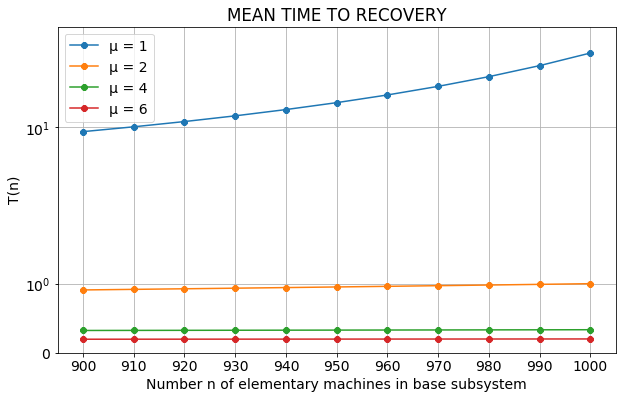

In [16]:
n, N = 900, 1000
fig, ax_μ = plt.subplots(figsize=(10, 6))
x = [xi for xi in range(n, N+1, 10)]

ax_μ.set_ylim(0, 2**6)
ax_μ.set_xticks(x)
ax_μ.set_yscale('symlog')
ax_μ.grid()

ax_μ.set(title='MEAN TIME TO RECOVERY', \
       xlabel='Number n of elementary machines in base subsystem', \
       ylabel='T(n)')

for μi in (1, 2, 4, 6):
    y = [mean_time_to_recovery(ni, N, λ=1e-3, m=1, μ=μi) for ni in x]
    ax_μ.plot(x, y, '8-', label='μ = {0}'.format(μi))
    ax_μ.legend()
plt.rcParams.update({'font.size': 14})
plt.show()


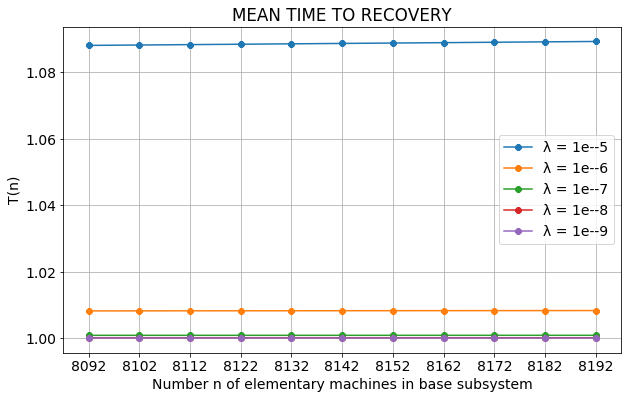

In [26]:
n, N = 8092, 8192
fig, ax_λ = plt.subplots(figsize=(10, 6))
x = [xi for xi in range(n, N+1, 10)]

#ax_λ.set_ylim(0, 2**6)
ax_λ.set_xticks(x)
#ax_λ.set_yscale('symlog')
ax_λ.grid()

ax_λ.set(title='MEAN TIME TO RECOVERY', \
       xlabel='Number n of elementary machines in base subsystem', \
       ylabel='T(n)')

for λi in range(-5, -10, -1):
    y = [mean_time_to_recovery(ni, N, λ=10**λi, m=1, μ=1) for ni in x]
    ax_λ.plot(x, y, '8-', label='λ = 1e-{0}'.format(λi))
    ax_λ.legend()

plt.rcParams.update({'font.size': 14})
plt.show()
fig.savefig('mttr_λ.png')


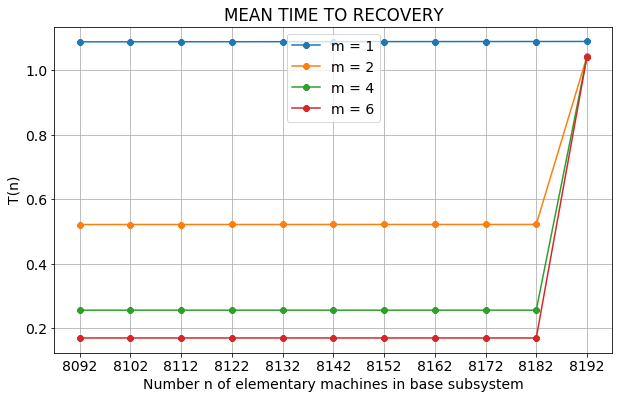

In [29]:
n, N = 8092, 8192
fig, ax_λ = plt.subplots(figsize=(10, 6))
x = [xi for xi in range(n, N+1, 10)]
ax_λ.set_xticks(x)
ax_λ.grid()

ax_λ.set(title='MEAN TIME TO RECOVERY', \
       xlabel='Number n of elementary machines in base subsystem', \
       ylabel='T(n)')


for mi in (1, 2, 4, 6):
    y = [mean_time_to_recovery(ni, N, λ=1e-5, m=mi, μ=1) for ni in x]
    ax_λ.plot(x, y, '8-', label='m = {0}'.format(mi))
    ax_λ.legend()

plt.rcParams.update({'font.size': 14})
plt.show()
fig.savefig('mttr_m.png')